- 2021-05-03 [ADD] 첫번째 EDA (이해강)

# 원티드 프리온보딩 3팀 week1 (1차 EDA)
## 주제 : 기업 데이터 속 예비 유니콘 기업 추출하기 
### - 유니콘 기업이란 무엇인가?
- 유니콘 기업(Unicorn)은 기업 가치가 10억 달러(=1조 원) 이상이고 창업한 지 10년 이하인 비상장 스타트업 기업을 말한다.

- *(참고) 기업가치 계산 방법 : https://brunch.co.kr/@jyzz21/7*
- *(참고) 2020년 유니콘기업 현황 : https://chloe-ki.tistory.com/entry/%ED%95%9C%EA%B5%AD-%EC%9C%A0%EB%8B%88%EC%BD%98-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85-%EB%A7%A4%EC%B6%9C-%EC%88%9C%EC%9C%84-2020*

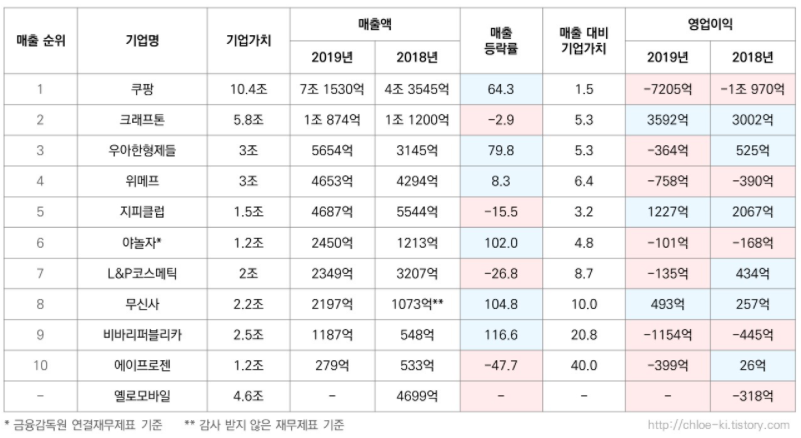

### 1. Data 살펴보기 및 분석방향 설정
#### Data : "company_nps_data.csv"
- **회사ID**	:  5000개의 회사ID 존재
- **연매출액** : 해당년도의 연매출액
- **년도** : 2015 ~ 2019 년까지의 년도 데이터
- **월**	: 1 ~ 12 월까지의 월 데이터
- **월별_연금보험료**	: 직원들의 연금 보험료 (월급의 일정 퍼센트)
- **월별_직원수** : 해당 회사의 월별 직원수

### <분석방향>
#### 1. 데이터를 보았을 때, 기업가치와 직접적으로 연관된 칼럼을 찾기 힘들기 때문에 일정 기준을 세팅 후, 예비 유니콘 기업을 추출하는 방향으로 설정
#### 2. 최대한 다양한 요소들을 분석해서 그 교집합이 큰 기업 선정
#### 3. 성장률(추이)을 주의 깊게 봐야함
#### 4. 절대적인 기준을 찾기보단 다양한 요인들을 조합해서 예비 유니콘 기업 선정


#### ㅡ> 그렇다면 제한된 Feature로 세팅할 수 있는 기준은 무엇이 있을까?

1. 연매출액의 성장률?

2. 연금보험료 납부액의 증가율?

3. 직원수의 증가율?

4. 직원수 대비 매출액? 

In [142]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [64]:
df = pd.read_csv('company_nps_data.csv',encoding='ansi')
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


### 연매출액의 성장률을 추출하기 위해 피벗테이블을 활용하여 '회사ID', '년도', '연매출액'만 추출

In [111]:
ndf = df.pivot_table('연매출액','회사ID','년도')
ndf.index = ndf.index.map(lambda x : str(x))
ndf.columns = ndf.columns.map(lambda x : str(x))
ndf

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,NaN,NaN,NaN,1.132878e+10,NaN
95,NaN,NaN,NaN,6.569474e+08,NaN
102,NaN,NaN,NaN,7.426589e+08,NaN
295,NaN,NaN,NaN,8.377670e+07,NaN
414,NaN,NaN,NaN,1.973277e+07,NaN
...,...,...,...,...,...
2400284,NaN,NaN,NaN,1.263406e+06,NaN
2437574,NaN,NaN,NaN,2.140160e+05,NaN
2693684,NaN,NaN,NaN,NaN,238076.0


### 회사ID별 연매출액 결측값이 많이 존재하는 것을 확인할 수 있음

### 2015년과 2019를 기준으로 성장률을 보기 위해 결측치들을 앞과 뒤의 값들로 채워줌

In [113]:
ndf.T.fillna(method = 'ffill',inplace=True)
ndf.T.fillna(method = 'bfill',inplace=True)

### 전체 회사ID별 연매출액의 추이를 보여주는 그래프 

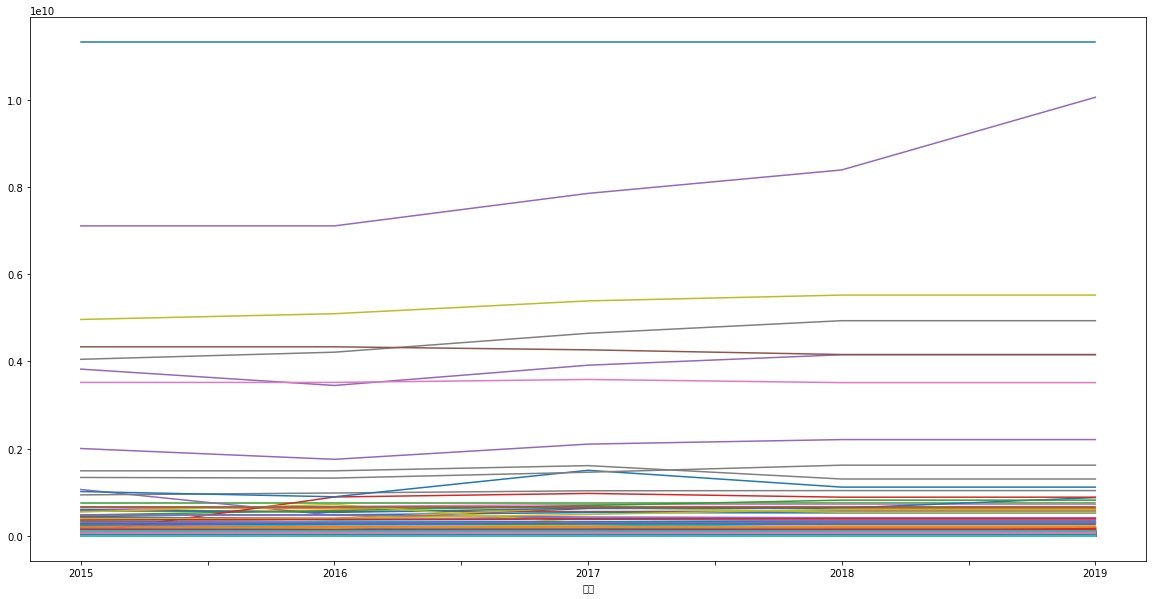

In [143]:
ndf.T.plot(figsize=(20,10),legend=False)

### 2015년과 2019년을 기준으로 회사별 연매출액이 얼마나 성장했는지를 나타내는 성장률 컬럼 생성

### 가장 큰 성장률을 보인 상위 30개의 회사 
**(1등 회사는 무려 2015년 대비 70000%의 성장률을 기록)**

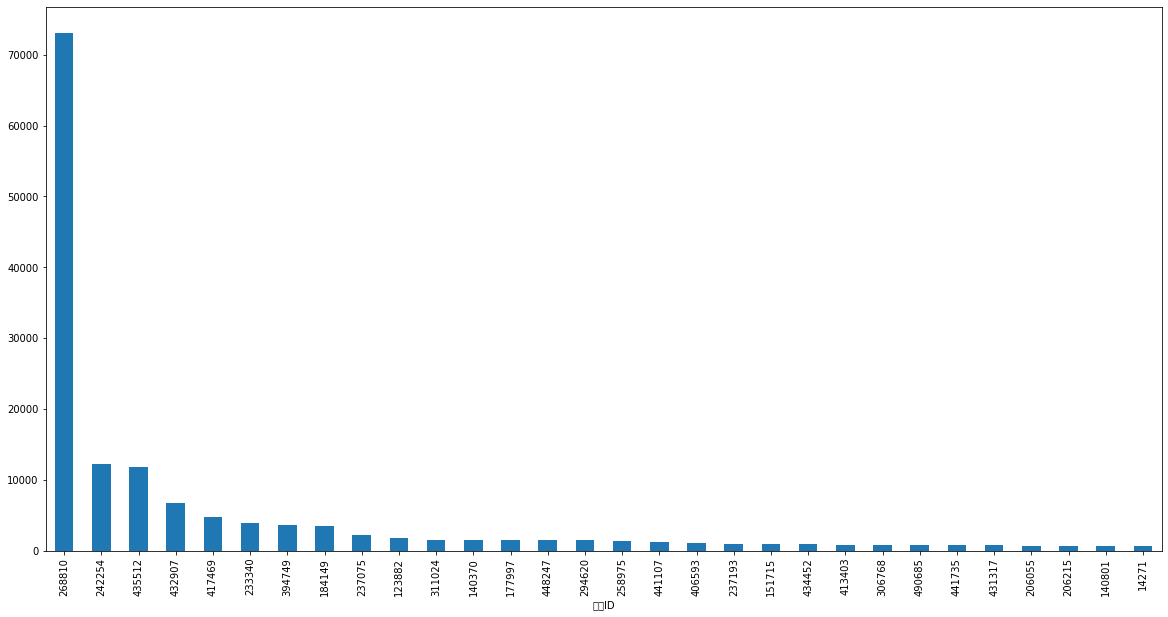

In [168]:
ndf1 = ndf[['2015','2019']]
ndf1['성장률'] = ((ndf1['2019']-ndf1['2015'])/ndf1['2015'])*100
ndf1['성장률'].sort_values(ascending=False).head(30).plot(kind='bar',figsize=(20,10))

### 상위 10개 회사의 연매출액 추이 그래프
- 모든 회사들이 연매출액 1억 미만을 보이는 것을 알 수 있음
- 1위 회사는 70000%의 성장률을 기록했지만, 데이터 상 마지막 년도 연매출액은 100만원 미만을 보임
- 연매출액에서 성장률이 큰 회사들이 존재하지만 연매출액이 1억이 안되는 상황에서 과연 이 회사들을 유니콘 기업이라 할 수 있는가? 에 대한 의문 존재

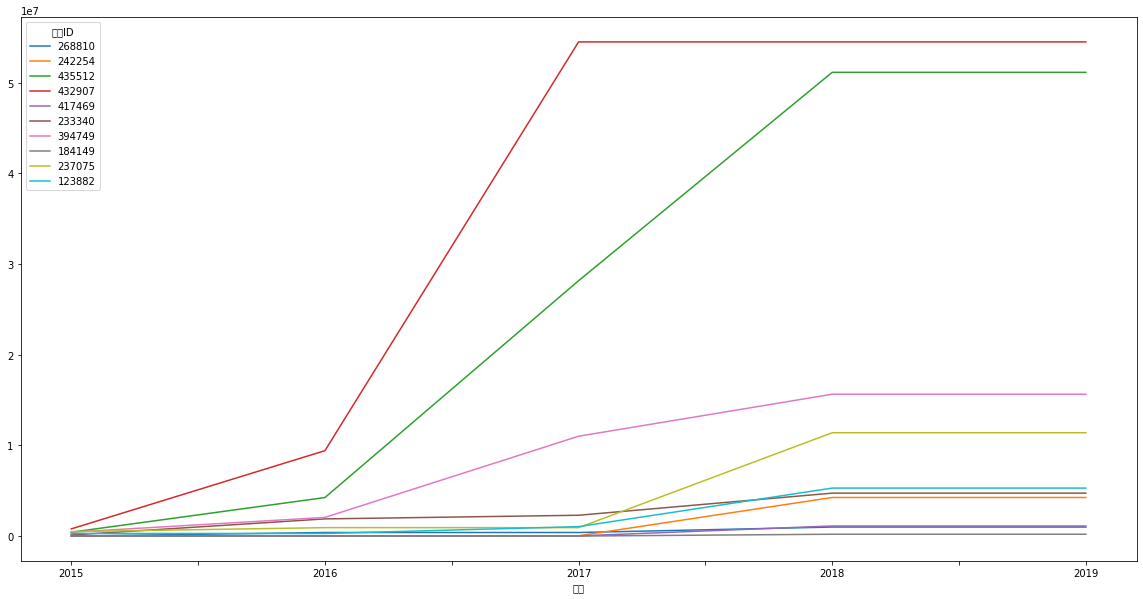

In [157]:
n_ndf = ndf.loc[['268810','242254','435512','432907','417469','233340','394749','184149','237075','123882']]
n_ndf.T.plot(figsize=(20,10))

### 따라서 2019년 기준 연매출액 10억 이상의 회사들만 따로 추출한 뒤, 성장률 컬럼 생성
- 12개의 회사들이 추출됨
- 아래와 같은 성장률을 보임

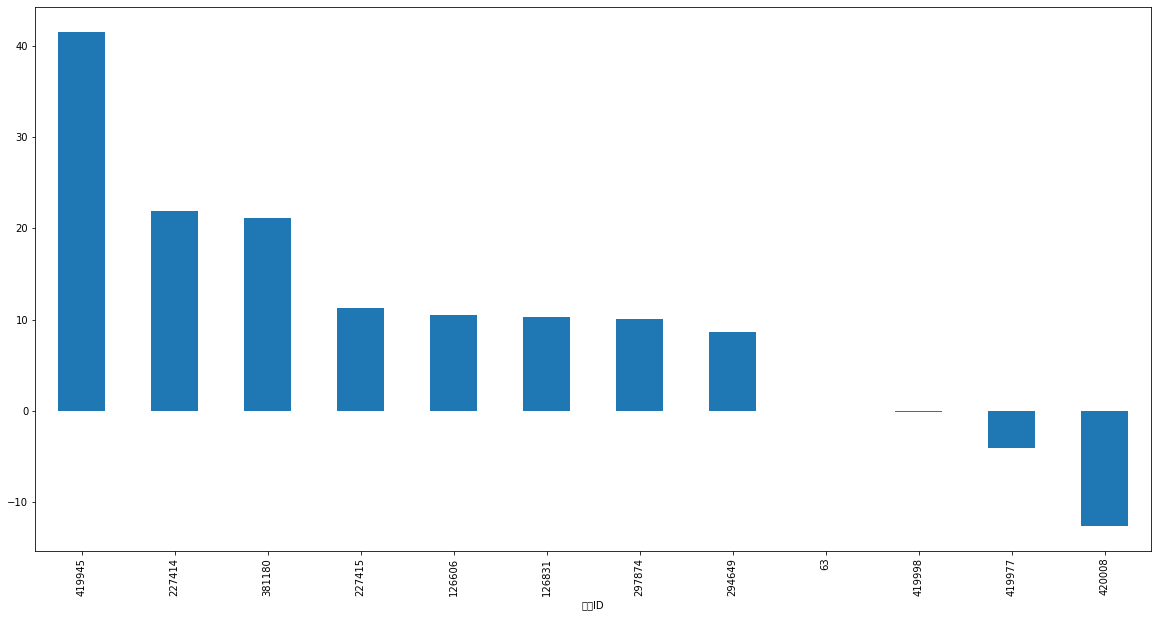

In [169]:
mask = ndf['2019'] >= 1000000000
ndf2 = ndf[mask]
ndf3 = ndf2[['2015','2019']]
ndf3['성장률'] = ((ndf2['2019']-ndf2['2015'])/ndf2['2015'])*100
ndf3['성장률'].sort_values(ascending=False).head(30).plot(kind='bar',figsize=(20,10))

In [170]:
ndf3['성장률'].sort_values(ascending=False).head(15)

회사ID
419945    41.509194
227414    21.886004
381180    21.089894
227415    11.272879
126606    10.512619
126831    10.254188
297874    10.035420
294649     8.626055
63         0.000000
419998    -0.139759
419977    -4.091557
420008   -12.609013
Name: 성장률, dtype: float64

### 연매출액 10억 이상 12개 회사의 연매출액 추이 그래프
- 12개 회사 중 연매출액이 증가한 회사는 8곳 나머지는 성장률 0 혹은 감소
- 8곳 중에서도 20%이상 증가한 회사는 3곳
- 그 중 가장 큰 성장을 보인 곳은 약 41%의 성장률을 기록한 "회사 419945"
- 회사 419945는 예비 유니콘 기업이라 할 수 있을까?

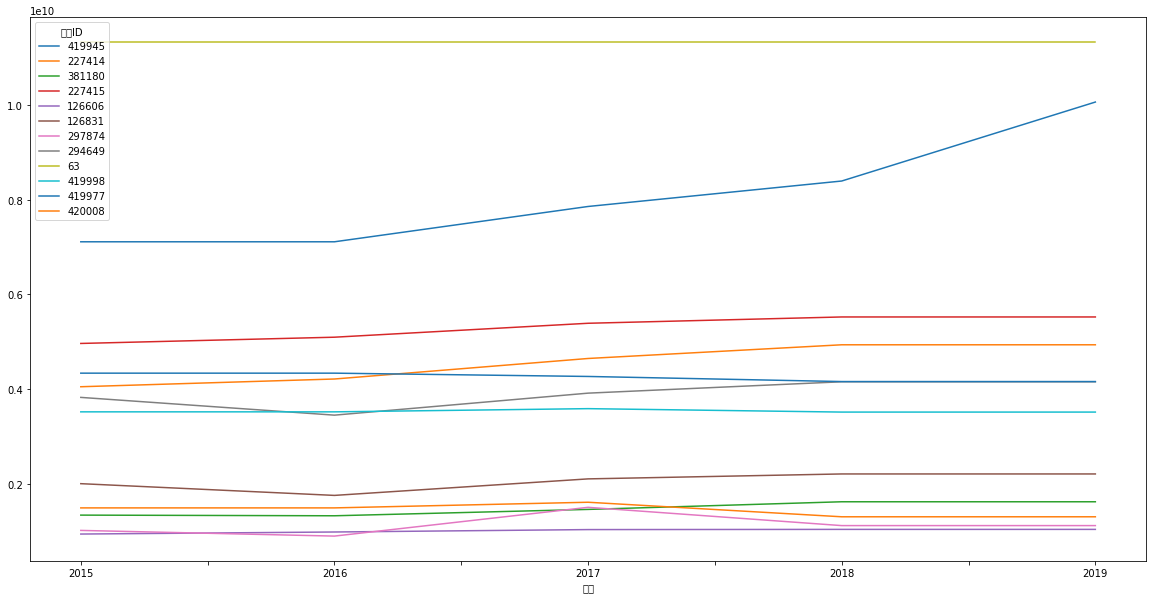

In [167]:
n_ndf = ndf.loc[['419945','227414','381180','227415','126606','126831','297874','294649','63','419998','419977','420008']]
n_ndf.T.plot(figsize=(20,10))

### 연매출액 1억 이상 10억 미만 회사의 성장률 순위
- 77개 회사가 추출 그중 40개의 회사만이 성장세를 보임
- 그 중 1400%의 성장률을 보이는 회사가 존재

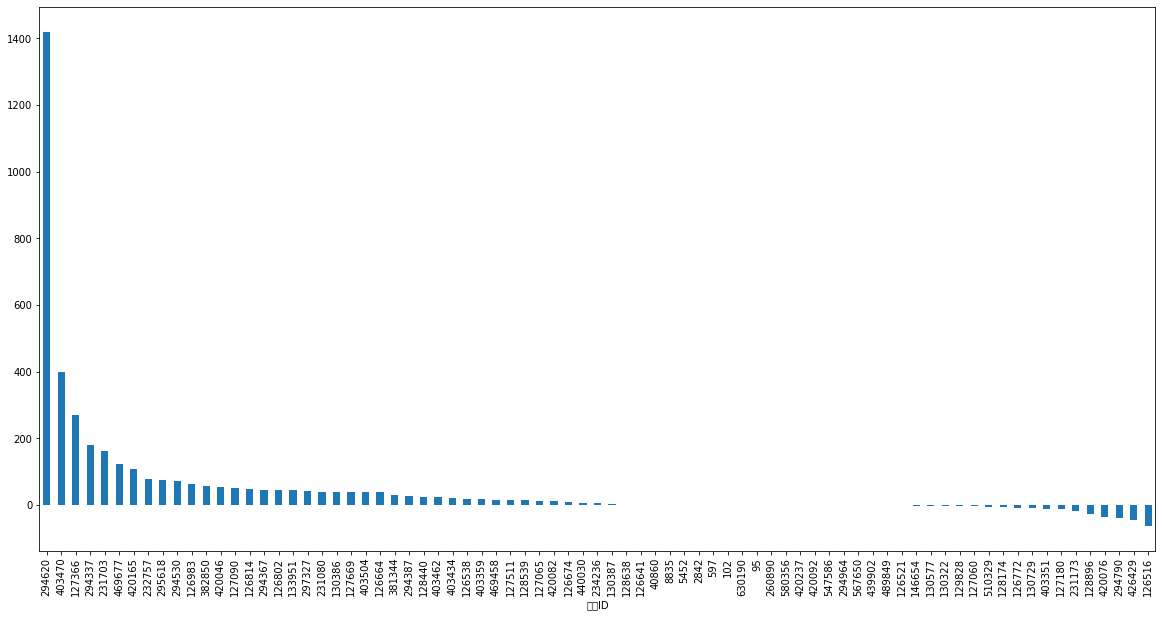

In [190]:
mask = (100000000 <= ndf['2019']) & (ndf['2019'] < 1000000000)
ndf4 = ndf[mask]
ndf5 = ndf4[['2015','2019']]
ndf5['성장률'] = ((ndf5['2019']-ndf5['2015'])/ndf5['2015'])*100
ndf5['성장률'].sort_values(ascending=False).plot(kind='bar',figsize=(20,10))

### 연매출액 1억 이상 10억 미만 상위 10개 회사의 연매출액 추이 그래프
- 가장 가파른 성장을 보이는 "회사 294620" 는 2017년까지 성장하다가 그 이후에 감소하는 모양세를 보임
- 과연 이 기업 또한 예비 유니콘 기업이라 할 수 있을까?라는 의문이 존재

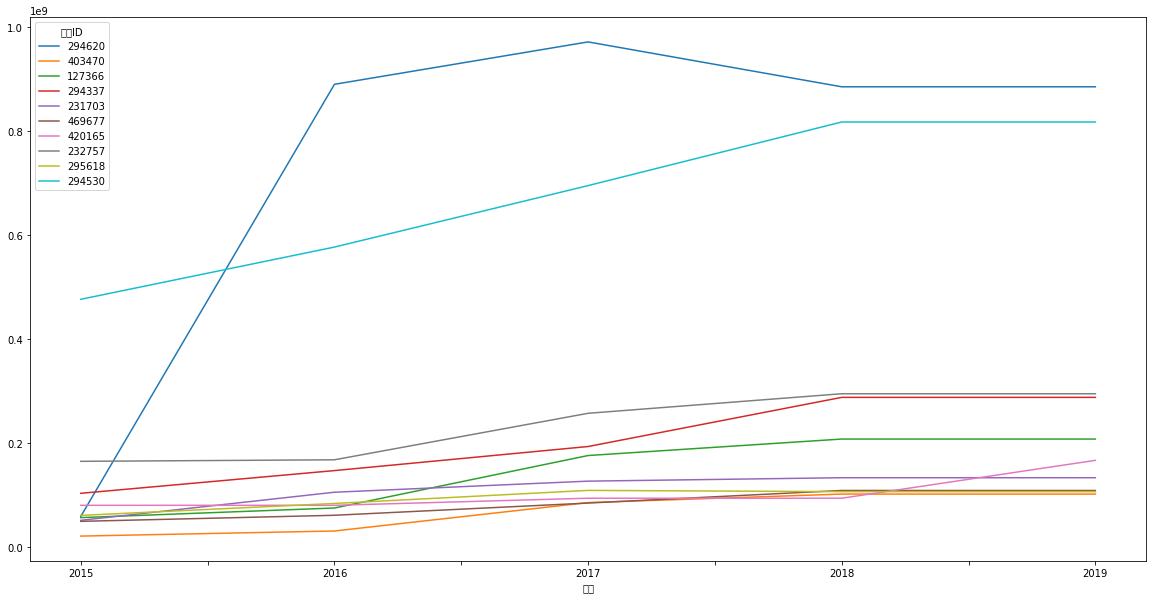

In [189]:
n_ndf = ndf.loc[['294620','403470','127366','294337','231703','469677','420165','232757','295618','294530']]
n_ndf.T.plot(figsize=(20,10))

## 첫번째 EDA를 토대로 우리가 해야할 일!
- 기준을 정해야 한다!

## 기준의 예시
- 연매출액이 ()억 이상
- 성장률이 ()% 이상